In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score as acc
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
Food_Supply_Quantity_kg_dataset = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')

In [3]:
Food_Supply_Quantity_kg_data = Food_Supply_Quantity_kg_dataset.fillna(0)
Food_Supply_Quantity_kg = Food_Supply_Quantity_kg_data.replace("<2.5", 2.5)
Food_Supply_Quantity_kg

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.005707,0.000168,0.000683,0.004855,38042000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,0.027047,0.001085,0.016445,0.009517,2858000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.009229,0.001037,0.004099,0.004094,43406000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.000086,0.000006,0.000022,0.000057,31427000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,0,0.024742,0.003093,0.011340,0.010309,97000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,4.1474,35.2416,25.2,21.2,0.001168,0.000056,0.000498,0.000614,28516000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,11.9508,41.4232,2.1,9.3,0.000282,0.000000,0.000229,0.000053,95656000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,3.2135,44.2126,14.1,38.9,0.000021,0.000007,0.000003,0.000010,29162000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,3.4649,43.9789,6.5,46.7,0.000593,0.000017,0.000308,0.000269,17861000.0,%


In [4]:
Food_Supply_Quantity_kg.shape

(170, 32)

In [5]:
Food_Supply_Quantity_kg.describe()

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Confirmed,Deaths,Recovered,Active,Population
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02
mean,3.022971,0.221064,12.181871,0.013994,11.800347,0.470570,1.387195,5.621405,3.375934,6.519776,...,0.117474,0.851554,6.085912,37.814834,18.377647,0.055420,0.003146,0.023936,0.028384,4.408395e+07
std,2.382243,0.278304,5.852635,0.129382,5.824870,0.331209,1.257382,3.152849,1.762911,5.020379,...,0.146143,0.445335,3.560148,5.852943,9.862101,0.102105,0.009198,0.066140,0.051506,1.556265e+08
min,0.000000,0.001000,1.739100,0.000000,3.401400,0.023900,0.034200,0.659600,0.356000,0.096300,...,0.000000,0.091500,0.857000,23.113200,0.000000,0.000000,0.000000,0.000000,0.000000,5.300000e+04
25%,0.895625,0.040225,7.236850,0.000000,7.226850,0.187575,0.557100,3.541950,1.891475,2.172250,...,0.020750,0.507700,3.616500,33.552775,8.200000,0.001828,0.000031,0.000612,0.000752,2.822750e+06
50%,2.866150,0.116850,12.097550,0.000000,10.142750,0.460150,1.029250,5.021250,3.424750,5.336900,...,0.079950,0.774450,5.028100,37.900700,20.700000,0.011359,0.000262,0.003012,0.006016,1.014600e+07
75%,4.710950,0.253900,16.444125,0.001400,15.148950,0.644150,1.821275,6.827750,4.422450,10.407100,...,0.148650,1.070900,7.801650,42.762775,25.700000,0.065676,0.001429,0.016986,0.027371,3.169250e+07
max,15.370600,1.355900,26.886500,1.679400,29.804500,1.696000,8.795900,19.302800,8.170000,20.837800,...,0.756900,2.202600,19.299500,48.258500,45.600000,0.610323,0.066277,0.518226,0.266797,1.398030e+09


In [6]:
Food_Supply_Quantity_kg.isnull().any()

Country                         False
Alcoholic Beverages             False
Animal fats                     False
Animal Products                 False
Aquatic Products, Other         False
Cereals - Excluding Beer        False
Eggs                            False
Fish, Seafood                   False
Fruits - Excluding Wine         False
Meat                            False
Milk - Excluding Butter         False
Miscellaneous                   False
Offals                          False
Oilcrops                        False
Pulses                          False
Spices                          False
Starchy Roots                   False
Stimulants                      False
Sugar & Sweeteners              False
Sugar Crops                     False
Treenuts                        False
Vegetable Oils                  False
Vegetables                      False
Vegetal Products                False
Obesity                         False
Undernourished                  False
Confirmed   

In [7]:
X = Food_Supply_Quantity_kg[['Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter','Miscellaneous','Offals','Oilcrops','Pulses','Spices','Starchy Roots','Stimulants','Sugar & Sweeteners','Sugar Crops','Treenuts','Vegetable Oils','Vegetables','Vegetal Products','Obesity','Population']]

y = Food_Supply_Quantity_kg['Deaths']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Alcoholic Beverages,2.416276e+00
Animal fats,1.788307e+00
Animal Products,2.692279e+00
"Aquatic Products, Other",1.759395e+00
Cereals - Excluding Beer,2.415575e+00
Eggs,1.785680e+00
"Fish, Seafood",1.784665e+00
Fruits - Excluding Wine,2.415884e+00
Meat,1.783661e+00
Milk - Excluding Butter,1.783982e+00


In [11]:
y_pred = regressor.predict(X_test)

In [12]:
# calculating mse

mse = np.mean((y_pred - y_test)**2)

mse

# evaluation using r-square

regressor.score(X_test,y_test)


-1.4302666340077996

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df1 = df.head(25)  

df
df1

,Actual,Predicted
139,0.000000,-0.000920
30,0.000332,0.033170
119,0.000140,0.008836
29,0.001188,0.003567
144,0.000166,-0.000239
163,0.000027,0.002597
166,0.000000,0.003035
51,0.037650,0.011169
105,0.000000,0.001825
60,0.000091,0.002318


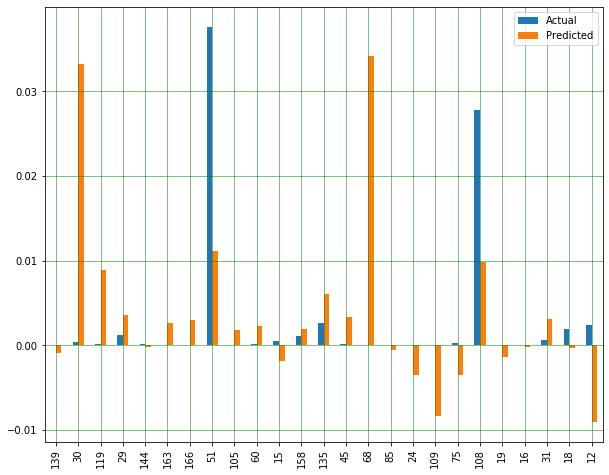

In [14]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.007061610437013741
Mean Squared Error: 0.0001462387936443294
Root Mean Squared Error: 0.012092923287788169


In [16]:
model = LinearRegression()

# fit the model with the training data
model.fit(X_train,y_train)

# coefficeints of the trained model
print('\nCoefficient of model :', model.coef_)

# intercept of the model
print('\nIntercept of model',model.intercept_)


Coefficient of model : [2.41627610e+00 1.78830714e+00 2.69227858e+00 1.75939467e+00
 2.41557497e+00 1.78567963e+00 1.78466461e+00 2.41588406e+00
 1.78366087e+00 1.78398246e+00 2.41386174e+00 1.78202725e+00
 2.41585775e+00 2.41641813e+00 2.40628595e+00 2.41575663e+00
 2.42014646e+00 2.41513137e+00 2.41604664e+00 2.42386725e+00
 2.41737683e+00 2.41580811e+00 2.06026058e+00 3.22401657e-05
 2.44233522e-11]

Intercept of model -223.80507827222436


In [17]:
# predict the target on the test dataset
predict_train = model.predict(X_train)
print('\n... on training data',predict_train) 

# Root Mean Squared Error on training dataset
rmse_train = mean_squared_error(y_train,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)

# predict the target on the testing dataset
predict_test = model.predict(X_test)
print('\n... on test data',predict_test) 

# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(y_test,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


... on training data [ 3.00657744e-03  8.99720384e-03  1.92109250e-03 -2.10820139e-03
  2.85143464e-04  3.86247262e-03  8.50498788e-03  3.74149797e-03
  1.17256006e-02  1.20023926e-02  8.02527288e-03  2.51570623e-03
  1.61143662e-03  6.27358135e-04  5.60242244e-03  6.56744531e-03
  1.46491244e-03  1.75517043e-02  2.65868109e-03 -1.97775478e-03
  8.12859745e-03  4.90557790e-04  1.87657349e-03  8.02829868e-04
  5.38091034e-03  6.54587297e-03  8.96839590e-03 -7.99830746e-04
  6.27474875e-03 -1.26679776e-03  2.01331713e-04  1.18991856e-02
  1.36117999e-03  6.22156933e-03 -3.54584893e-03  4.87535548e-03
  6.95711304e-03 -9.73862131e-04  6.07275267e-03  5.45224191e-03
  4.50996037e-04  6.24920593e-04  2.55808831e-03 -4.46103084e-03
 -7.83067924e-05  8.09973594e-04  2.64597325e-04 -3.15013402e-03
  9.13123529e-03 -1.60054155e-04  3.08794603e-03 -4.43535428e-04
  1.25513860e-02  1.00765568e-03  1.08670307e-02 -2.36726289e-03
  1.52944054e-03 -2.78436230e-03 -3.53230505e-04  1.43640436e-03
 -1

In [18]:
model.params

AttributeError: 'LinearRegression' object has no attribute 'params'

In [19]:
model.pvalues

AttributeError: 'LinearRegression' object has no attribute 'pvalues'

In [20]:
model.rsquared

AttributeError: 'LinearRegression' object has no attribute 'rsquared'

In [21]:
X = Food_Supply_Quantity_kg[['Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter','Miscellaneous','Offals','Oilcrops','Pulses','Spices','Starchy Roots','Stimulants','Sugar & Sweeteners','Sugar Crops','Treenuts','Vegetable Oils','Vegetables','Vegetal Products','Obesity','Population']]
y = Food_Supply_Quantity_kg['Deaths']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2.109
Date:                Fri, 08 May 2020   Prob (F-statistic):            0.00336
Time:                        17:23:05   Log-Likelihood:                 582.90
No. Observations:                 170   AIC:                            -1114.
Df Residuals:                     144   BIC:                            -1032.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -67.9482    501.696     -0.135      0.892   -1059.587     923.691
Alcoholic Beverages          0.7626      5.016      0.152      0.879      -9.151      10.677
Animal fats                  0.8405      5.090      0.165      0.869      -9.220      10.901
Animal Products              0.5233      5.064      0.103      0.918      -9.487      10.533
Aquatic Products, Other      0.8329      5.090      0.164      0.870      -9.227      10.893
Cereals - Excluding Beer     0.7620      5.016      0.152      0.879      -9.152      10.676
Eggs                         0.8355      5.090      0.164      0.870      -9.226      10.897
Fish, Seafood                0.8369      5.090      0.164      0.870      -9.224      10.898
Fruits - Excluding Wine      0.7623      5.016      0.152      0.879      -9.152      10.676
Meat                         0.8357      5.090      0.164      0.870      -9.225      10.897
Milk - Excluding Butter      0.8360      5.090      0.164      0.870      -9.225      10.897
Miscellaneous                0.7606      5.016      0.152      0.880      -9.153      10.675
Offals                       0.8320      5.090      0.163      0.870      -9.228      10.892
Oilcrops                     0.7620      5.016      0.152      0.879      -9.152      10.676
Pulses                       0.7626      5.016      0.152      0.879      -9.152      10.677
Spices                       0.7552      5.015      0.151      0.881      -9.158      10.669
Starchy Roots                0.7621      5.016      0.152      0.879      -9.152      10.676
Stimulants                   0.7655      5.016      0.153      0.879      -9.149      10.680
Sugar & Sweeteners           0.7615      5.016      0.152      0.880      -9.153      10.675
Sugar Crops                  0.7625      5.016      0.152      0.879      -9.151      10.677
Treenuts                     0.7702      5.016      0.154      0.878      -9.144      10.685
Vegetable Oils               0.7640      5.016      0.152      0.879      -9.150      10.678
Vegetables                   0.7621      5.016      0.152      0.879      -9.152      10.676
Vegetal Products             0.5967      5.019      0.119      0.906      -9.324      10.518
Obesity                   5.783e-05      0.000      0.536      0.593      -0.000       0.000
Population                2.333e-12   4.55e-12      0.513      0.609   -6.66e-12    1.13e-11
==============================================================================
Omnibus:                      170.205   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3255.531
Skew:                           3.819   Prob(JB):                         0.00
Kurtosis:                      23.032   Cond. No.                     

In [22]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [23]:
pred_train_lr= regressor.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

0.008147093014963682
0.2625155774983463
0.012092923287788169
-1.4302666340077996


In [24]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

0.008255332860458627
0.24278940849884711
0.009236493453633244
-0.4177693458430136


C:\Users\Roy\Anaconda3\Scripts\New folder\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.60862e-20): result may not be accurate.
  overwrite_a=True).T


In [25]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

0.008988458103001837
0.1023275453782041
0.009481516654747793
-0.4939874628932852


In [26]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

0.00884406990545589
0.1309358493620777
0.00979678545946355
-0.5949920530256831


In [27]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [28]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [29]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

1.004616501282523

In [30]:
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))

6.092857415576234e-05

In [31]:
lasso = Lasso(max_iter = 10000, normalize = True)
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
lassocv.alpha_

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

5.740502051092985e-05

In [32]:
lassocv.alpha_

3.233373245099953e-05